In [2]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better visuals
plt.rcParams["figure.figsize"] = (10,6)
sns.set(style="whitegrid")
# Upload file manually
from google.colab import files
uploaded = files.upload()

Saving Tariff Calculations plus Population.csv to Tariff Calculations plus Population.csv


In [4]:
# Load the uploaded file
import io

# Replace with your filename if needed
df = pd.read_csv(io.BytesIO(uploaded['Tariff Calculations plus Population.csv']), sep='\t') # Changed the separator to tab ('\t')

# Quick look
df.head()

,Country;US 2024 Deficit;US 2024 Exports;US 2024 Imports (Customs Basis);Trump Tariffs Alleged;Trump Response;Population
0,Afghanistan;-11.1;11.4;22.6;49%;25%;41454761
1,Albania;13.4;141.7;128.3;10%;10%;2745972
2,"Algeria;-1,447.10;1,014.50;2,461.60;59%;29%;46..."
3,Andorra;1.5;4.9;3.4;10%;10%;80856
4,"Angola;-1,186.90;682.4;1,869.20;63%;32%;36749906"


In [5]:
# Dataset info
df.info()

# Quick stats
df.describe()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 1 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   Country;US 2024 Deficit;US 2024 Exports;US 2024 Imports (Customs Basis);Trump Tariffs Alleged;Trump Response;Population  204 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


,0
Country;US 2024 Deficit;US 2024 Exports;US 2024 Imports (Customs Basis);Trump Tariffs Alleged;Trump Response;Population,0


In [6]:
# Dataset structure: columns, types, missing values
df.info()
# Quick statistical overview
df.describe()
# Check for any missing values in the dataset
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 1 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   Country;US 2024 Deficit;US 2024 Exports;US 2024 Imports (Customs Basis);Trump Tariffs Alleged;Trump Response;Population  204 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


,0
Country;US 2024 Deficit;US 2024 Exports;US 2024 Imports (Customs Basis);Trump Tariffs Alleged;Trump Response;Population,0


In [7]:
df.columns

Index(['Country;US 2024 Deficit;US 2024 Exports;US 2024 Imports (Customs Basis);Trump Tariffs Alleged;Trump Response;Population'], dtype='object')

In [8]:
# Re-load the file properly
df = pd.read_csv(io.BytesIO(uploaded['Tariff Calculations plus Population.csv']), delimiter=';')

# Check again
df.head()

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population
0,Afghanistan,-11.1,11.4,22.6,49%,25%,41454761.0
1,Albania,13.4,141.7,128.3,10%,10%,2745972.0
2,Algeria,"-1,447.10","1,014.50","2,461.60",59%,29%,46164219.0
3,Andorra,1.5,4.9,3.4,10%,10%,80856.0
4,Angola,"-1,186.90",682.4,"1,869.20",63%,32%,36749906.0


In [9]:
# Check data types
df.dtypes

,0
Country,object
US 2024 Deficit,object
US 2024 Exports,object
US 2024 Imports (Customs Basis),object
Trump Tariffs Alleged,object
Trump Response,object
Population,float64


In [11]:
# Remove $ and , from numeric columns and convert to float
# Remove $ and , from numeric columns and convert to float
cols_to_clean = ['US 2024 Deficit', 'US 2024 Exports', 'US 2024 Imports (Customs Basis)', 'Trump Tariffs Alleged', 'Population']

for col in cols_to_clean:
    # Remove $, commas, and percentage signs before converting to float
    df[col] = df[col].replace('[\$,%]', '', regex=True).astype(float)

# Double-check
df.dtypes


,0
Country,object
US 2024 Deficit,float64
US 2024 Exports,float64
US 2024 Imports (Customs Basis),float64
Trump Tariffs Alleged,float64
Trump Response,object
Population,float64


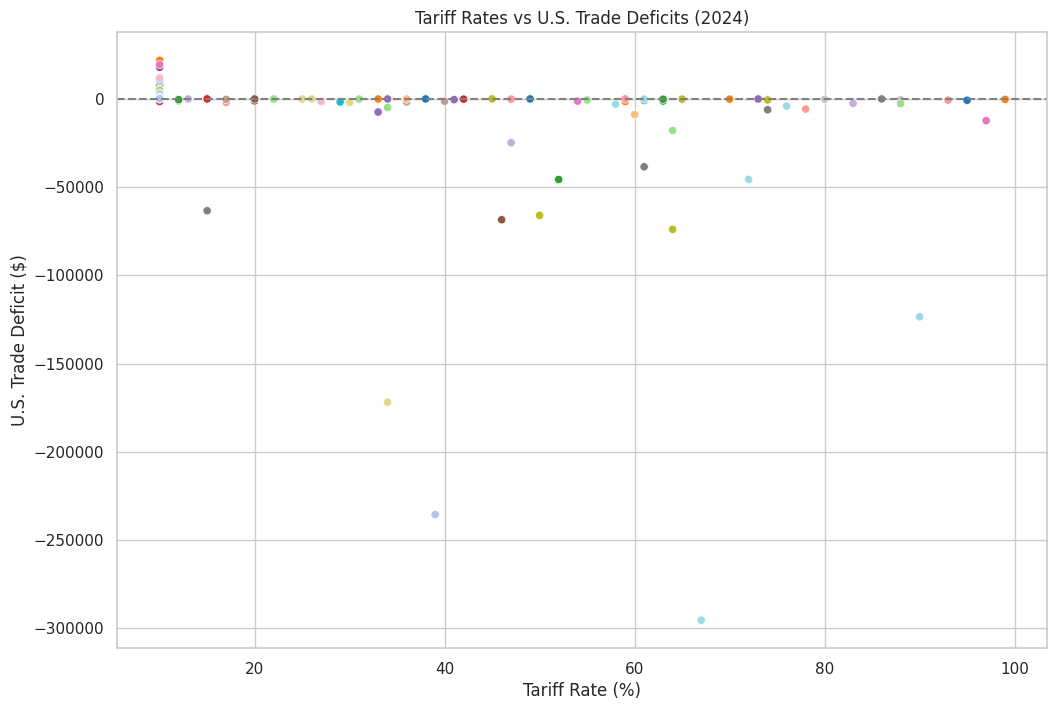

In [12]:
# Scatter Plot: Tariff Rate vs. Trade Deficit
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df,
    x='Trump Tariffs Alleged',
    y='US 2024 Deficit',
    hue='Country',
    palette='tab20',
    legend=False
)

plt.title('Tariff Rates vs U.S. Trade Deficits (2024)')
plt.xlabel('Tariff Rate (%)')
plt.ylabel('U.S. Trade Deficit ($)')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


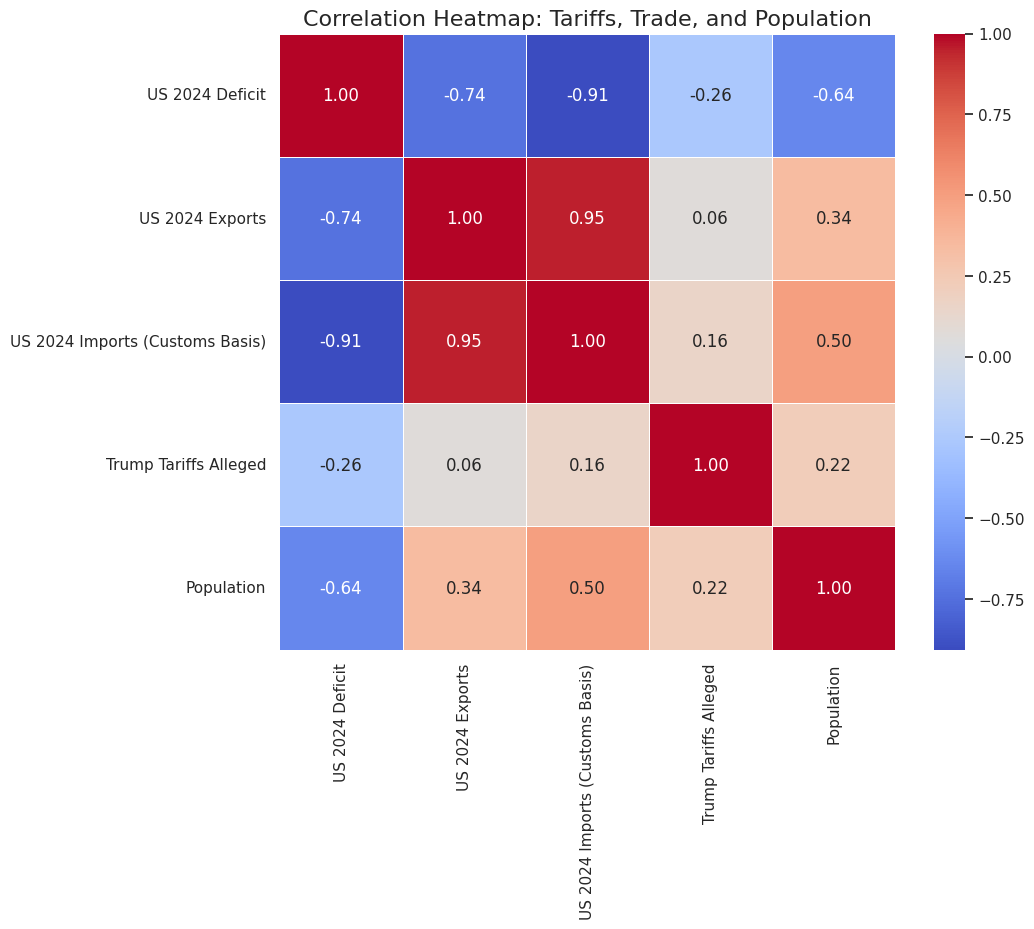

In [13]:
# Build correlation matrix
corr = df[['US 2024 Deficit', 'US 2024 Exports', 'US 2024 Imports (Customs Basis)', 'Trump Tariffs Alleged', 'Population']].corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title('Correlation Heatmap: Tariffs, Trade, and Population', fontsize=16)
plt.show()


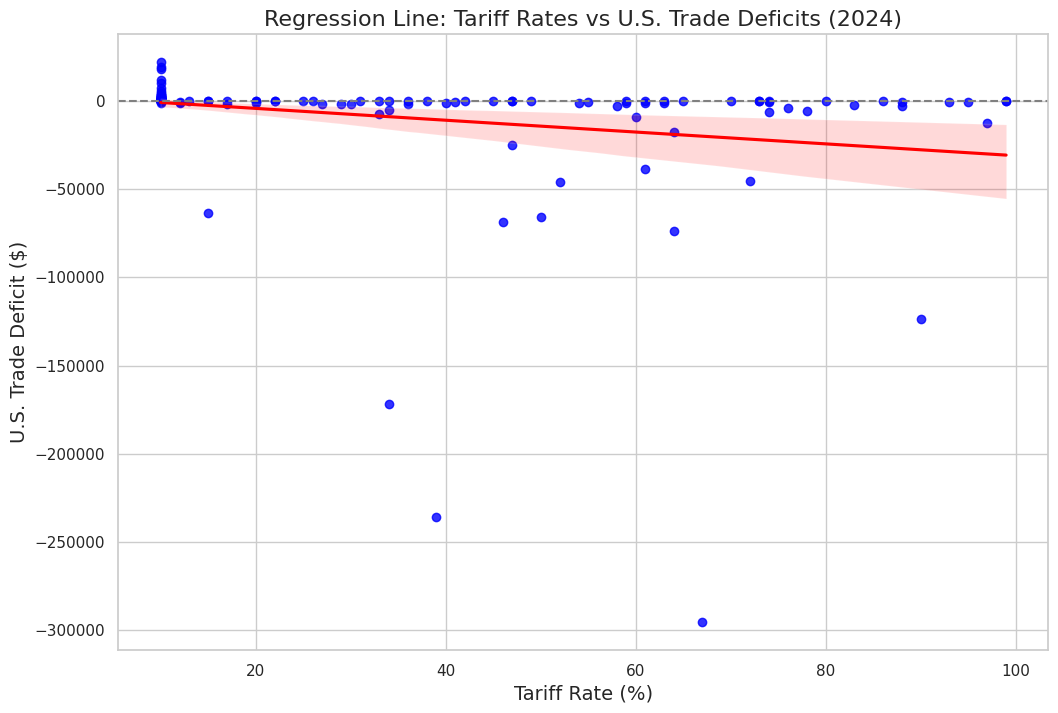

In [14]:
# Regression plot: Tariffs vs Trade Deficit
plt.figure(figsize=(12,8))

# Scatter plot with regression line
sns.regplot(
    data=df,
    x='Trump Tariffs Alleged',
    y='US 2024 Deficit',
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
    ci=95  # 95% confidence interval
)

plt.title('Regression Line: Tariff Rates vs U.S. Trade Deficits (2024)', fontsize=16)
plt.xlabel('Tariff Rate (%)', fontsize=14)
plt.ylabel('U.S. Trade Deficit ($)', fontsize=14)
plt.axhline(0, color='gray', linestyle='--')  # Zero trade balance line
plt.grid(True)
plt.show()


In [15]:
from scipy import stats

# Calculate regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Trump Tariffs Alleged'], df['US 2024 Deficit'])

print(f"Regression Equation: Trade Deficit = {slope:.2f} * Tariff Rate + {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")


Regression Equation: Trade Deficit = -335.00 * Tariff Rate + 2468.79
R-squared: 0.07
